In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [ ]:
df = pd.read_csv('/content/googl_data_2020_2025.csv')
df.head()


,Price,Adj Close,Close,High,Low,Open,Volume
0,Ticker,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL
1,Date,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-02 00:00:00+00:00,68.18682098,68.43399811,68.43399811,67.32450104,67.42050171,27278000
3,2020-01-03 00:00:00+00:00,67.83010101,68.0759964,68.6875,67.36599731,67.40000153,23408000
4,2020-01-06 00:00:00+00:00,69.63805389,69.89050293,69.91600037,67.55000305,67.58149719,46768000


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260 entries, 0 to 1259
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1260 non-null   object
 1   Adj Close  1259 non-null   object
 2   Close      1259 non-null   object
 3   High       1259 non-null   object
 4   Low        1259 non-null   object
 5   Open       1259 non-null   object
 6   Volume     1259 non-null   object
dtypes: object(7)
memory usage: 69.0+ KB


In [ ]:
df.columns


Index(['Price', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

In [ ]:
df.reset_index(drop=True, inplace=True)
df.head()


,Price,Adj Close,Close,High,Low,Open,Volume
0,Ticker,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL
1,Date,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-02 00:00:00+00:00,68.18682098,68.43399811,68.43399811,67.32450104,67.42050171,27278000
3,2020-01-03 00:00:00+00:00,67.83010101,68.0759964,68.6875,67.36599731,67.40000153,23408000
4,2020-01-06 00:00:00+00:00,69.63805389,69.89050293,69.91600037,67.55000305,67.58149719,46768000


In [ ]:
df.isnull().sum()


,0
Price,0
Adj Close,1
Close,1
High,1
Low,1
Open,1
Volume,1


In [ ]:
df.describe()


,Price,Adj Close,Close,High,Low,Open,Volume
count,1260,1259,1259,1259,1259,1259,1259
unique,1260,1240,1236,1224,1229,1221,1252
top,2024-12-31 00:00:00+00:00,105.5872421,105.9700012,138,128.9600067,138.5,22288000
freq,1,3,3,3,2,3,3


In [ ]:
price_cols = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Price']

for col in price_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

df['Volume'] = pd.to_numeric(df['Volume'], errors='coerce')

df.dropna(inplace=True)

df.head()


,Price,Adj Close,Close,High,Low,Open,Volume


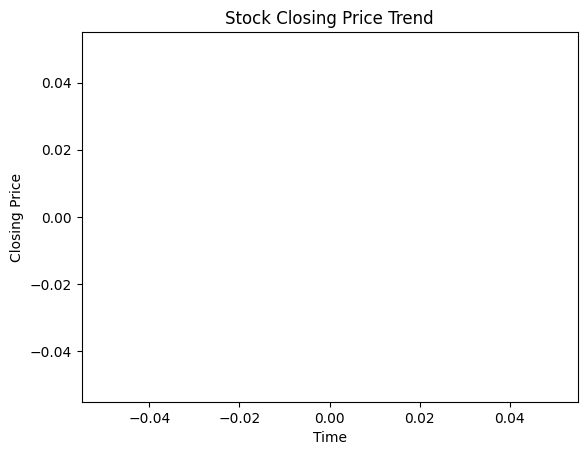

In [ ]:
plt.figure()
plt.plot(df.index, df['Close'].values)
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.title('Stock Closing Price Trend')
plt.show()


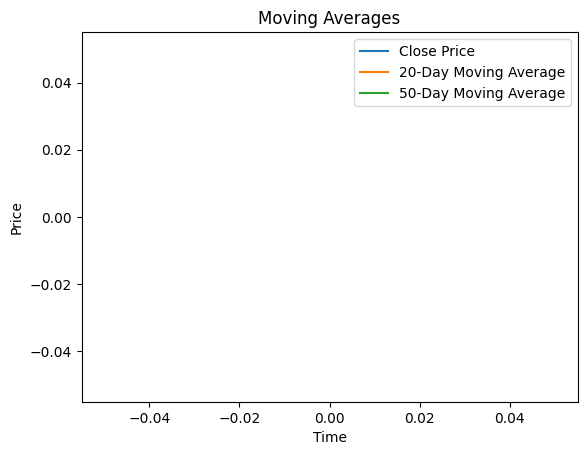

In [ ]:
df['MA_20'] = df['Close'].rolling(window=20).mean()
df['MA_50'] = df['Close'].rolling(window=50).mean()

plt.figure()
plt.plot(df['Close'], label='Close Price')
plt.plot(df['MA_20'], label='20-Day Moving Average')
plt.plot(df['MA_50'], label='50-Day Moving Average')
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Moving Averages')
plt.legend()
plt.show()


In [ ]:
df = pd.read_csv('/content/googl_data_2020_2025.csv')
df.head()

,Price,Adj Close,Close,High,Low,Open,Volume
0,Ticker,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL
1,Date,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-02 00:00:00+00:00,68.18682098,68.43399811,68.43399811,67.32450104,67.42050171,27278000
3,2020-01-03 00:00:00+00:00,67.83010101,68.0759964,68.6875,67.36599731,67.40000153,23408000
4,2020-01-06 00:00:00+00:00,69.63805389,69.89050293,69.91600037,67.55000305,67.58149719,46768000


In [ ]:
cols_needed = ['Open', 'High', 'Low', 'Close', 'Volume']
for col in cols_needed:
    df[col] = pd.to_numeric(df[col], errors='coerce')
df = df.dropna(subset=cols_needed)
df.shape


(1258, 7)

In [ ]:
X = df[['Open', 'High', 'Low', 'Volume']]
y = df['Close']

print(X.shape, y.shape)


(1258, 4) (1258,)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

print(X_train.shape, X_test.shape)


(1006, 4) (252, 4)


In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
y_pred = model.predict(X_test)


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


MSE: 0.8918873842195678
MAE: 0.725454929771166
R2 Score: 0.9962172276094748


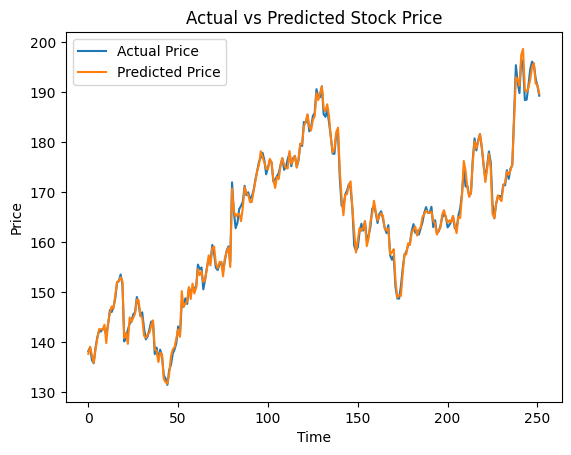

In [ ]:
plt.figure()
plt.plot(y_test.values, label='Actual Price')
plt.plot(y_pred, label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Actual vs Predicted Stock Price')
plt.legend()
plt.show()


In [ ]:
prediction_df = pd.DataFrame({
    'Actual Price': y_test.values,
    'Predicted Price': y_pred
})

prediction_df.head()


,Actual Price,Predicted Price
0,138.169998,137.605276
1,138.919998,139.040741
2,136.389999,137.345207
3,135.729996,135.813147
4,138.839996,138.467487
